In [311]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [312]:
data_amp = pd.read_csv('MPA_sub_bar_2004-2023_annuel.csv')
data_all = pd.read_csv('substrat_bar_1987-2023-annuel.csv')
data_atpp = pd.read_csv('ATPP_sub_bar_1990-2023_annuel.csv')

In [313]:
# rename date column
data_amp.rename(columns={'YearSeason': 'Date'}, inplace=True)
data_all.rename(columns={'YearSeason': 'Date'}, inplace=True)

In [314]:
# convert date columns to the same format
data_amp['Date'] = pd.to_datetime(data_amp['Date']).dt.to_period('M').dt.to_timestamp()
data_all['Date'] = pd.to_datetime(data_all['Date']).dt.to_period('M').dt.to_timestamp()
data_atpp['Date'] = pd.to_datetime(data_atpp['Date']).dt.to_period('M').dt.to_timestamp()

In [315]:
# merge dataframes
data = pd.merge(data_amp, data_all, on='Date', how='outer')
data = pd.merge(data, data_atpp, on='Date', how='outer')

In [316]:
data.set_index('Date', inplace=True)
data.index = pd.to_datetime(data.index)

In [317]:
# replace all _x named columns with _amp, _y with _all
data.columns = data.columns.str.replace('_x', '_amp')
data.columns = data.columns.str.replace('_y', '_all')

In [318]:
data

,Algae_amp,Dead Coral,Live Coral_amp,Others_amp,Pavement_amp,Rubble_amp,Sand_amp,Turf_amp,Algae_all,Calcified Algae_amp,...,Sand_all,Turf_all,Algae,Calcified Algae_all,Live Coral,Others,Pavement,Rubble,Sand,Turf
Date,,,,,,,,,,,,,,,,,,,,,
2004-10-01,0.080000,0.000000,0.153333,0.00,0.186667,0.246667,0.386667,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-01,0.020000,0.020000,0.213333,0.00,0.140000,0.213333,0.420000,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-01,0.041000,0.093667,0.274667,0.02,0.148000,0.050500,0.429333,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-01,0.066133,0.020000,0.363633,0.00,0.199200,0.178433,0.185867,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-01,0.020000,0.000000,0.260000,0.00,0.160000,0.260000,0.300000,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086,0.050,0.082,0.0,0.179,0.239,0.345,0.019
2020-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.104,0.034,0.085,0.0,0.135,0.157,0.446,0.039
2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.078,0.035,0.073,0.0,0.173,0.207,0.422,0.012


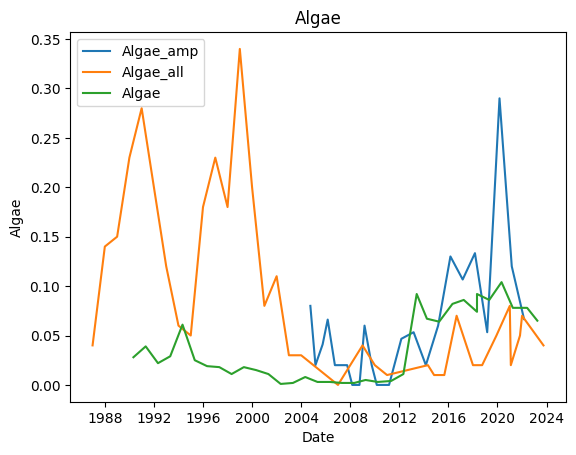

In [319]:
set_columns = ['Algae_amp', 'Algae_all', 'Algae']

# plot set of columns
plt.figure()
plt.title('Algae')
plt.xlabel('Date')
plt.ylabel('Algae')
plt.plot(data[set_columns], label=set_columns)
plt.legend()

In [320]:
data.columns

Index(['Algae_amp', 'Dead Coral', 'Live Coral_amp', 'Others_amp',
       'Pavement_amp', 'Rubble_amp', 'Sand_amp', 'Turf_amp', 'Algae_all',
       'Calcified Algae_amp', 'Live Coral_all', 'Others_all', 'Pavement_all',
       'Rubble_all', 'Sand_all', 'Turf_all', 'Algae', 'Calcified Algae_all',
       'Live Coral', 'Others', 'Pavement', 'Rubble', 'Sand', 'Turf'],
      dtype='object')

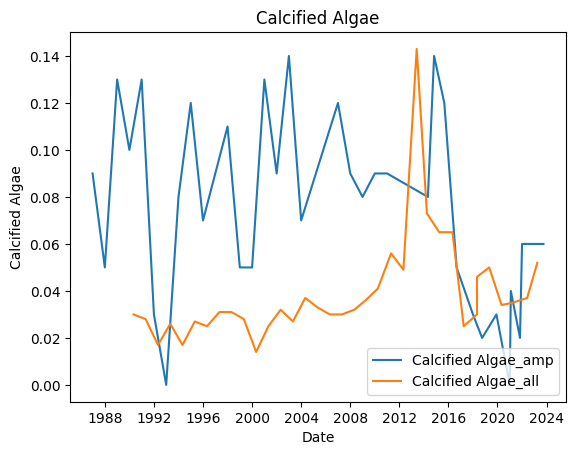

In [321]:
set_columns = ['Calcified Algae_amp', 'Calcified Algae_all']

# plot set of columns
plt.figure()
plt.title('Calcified Algae')
plt.xlabel('Date')
plt.ylabel('Calcified Algae')
plt.plot(data[set_columns], label=set_columns)
plt.legend()


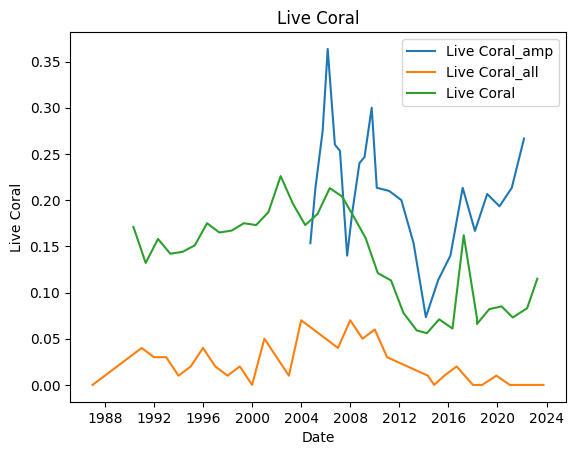

In [322]:
set_columns = ['Live Coral_amp', 'Live Coral_all', 'Live Coral']

# plot set of columns
plt.figure()
plt.title('Live Coral')
plt.xlabel('Date')
plt.ylabel('Live Coral')
plt.plot(data[set_columns], label=set_columns)
plt.legend()

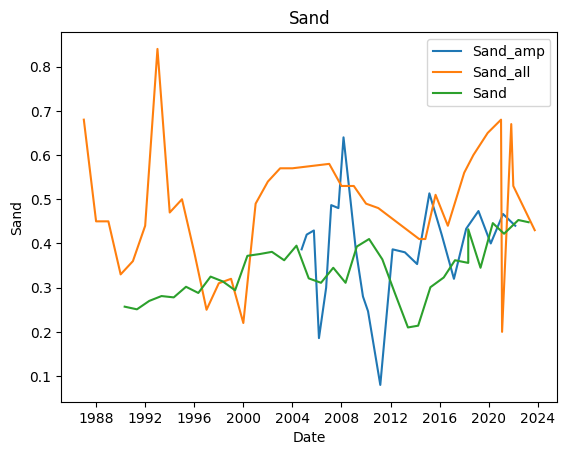

In [323]:
# for sand
set_columns = ['Sand_amp', 'Sand_all', 'Sand']

# plot set of columns
plt.figure()
plt.title('Sand')
plt.xlabel('Date')
plt.ylabel('Sand')
plt.plot(data[set_columns], label=set_columns)
plt.legend()

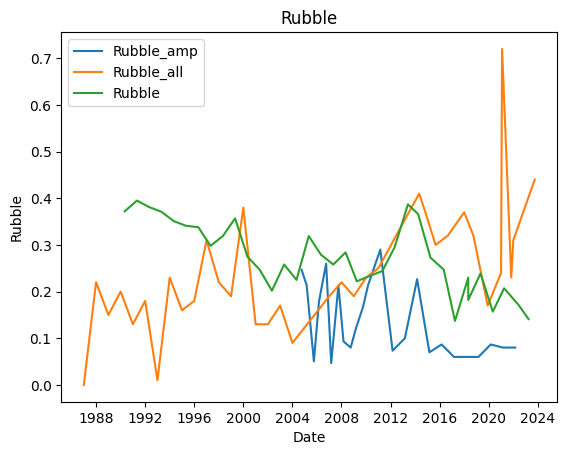

In [324]:
# for rubble
set_columns = ['Rubble_amp', 'Rubble_all', 'Rubble']

# plot set of columns
plt.figure()
plt.title('Rubble')
plt.xlabel('Date')
plt.ylabel('Rubble')
plt.plot(data[set_columns], label=set_columns)
plt.legend()


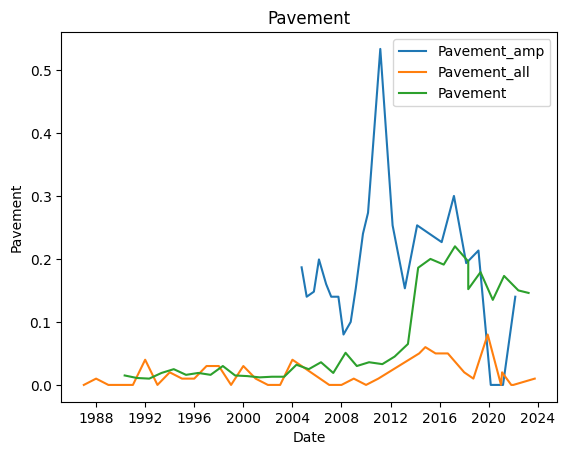

In [325]:
# for pavement
set_columns = ['Pavement_amp', 'Pavement_all', 'Pavement']

# plot set of columns
plt.figure()
plt.title('Pavement')
plt.xlabel('Date')
plt.ylabel('Pavement')
plt.plot(data[set_columns], label=set_columns)
plt.legend()

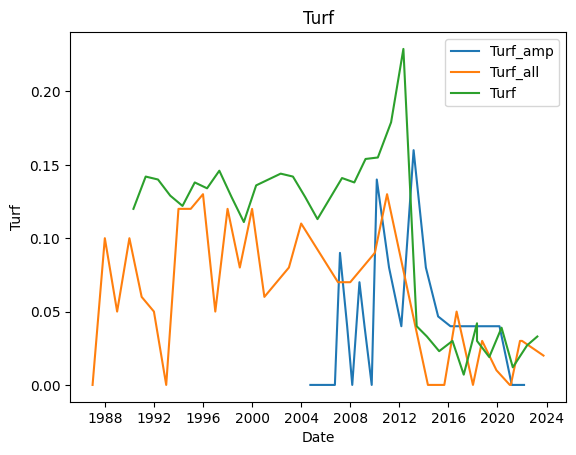

In [326]:
# for turf
set_columns = ['Turf_amp', 'Turf_all', 'Turf']

# plot set of columns
plt.figure()
plt.title('Turf')
plt.xlabel('Date')
plt.ylabel('Turf')
plt.plot(data[set_columns], label=set_columns)
plt.legend()

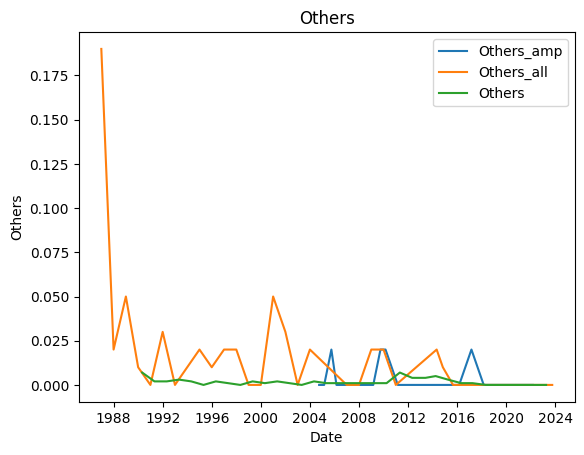

In [327]:
# for Others
set_columns = ['Others_amp', 'Others_all', 'Others']

# plot set of columns
plt.figure()
plt.title('Others')
plt.xlabel('Date')
plt.ylabel('Others')
plt.plot(data[set_columns], label=set_columns)
plt.legend()

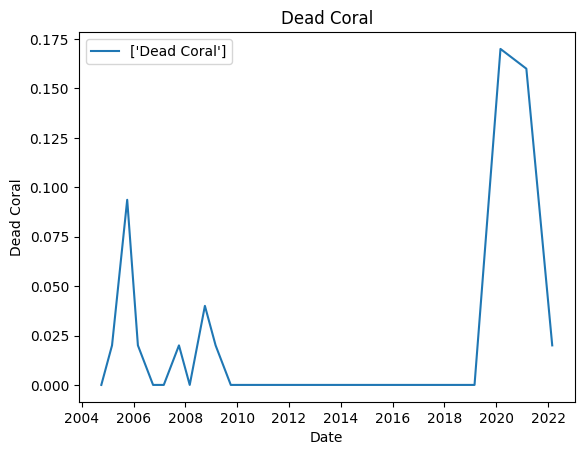

In [328]:
# plot Dead Coral
set_columns = ['Dead Coral']

# plot set of columns
plt.figure()
plt.title('Dead Coral')
plt.xlabel('Date')
plt.ylabel('Dead Coral')
plt.plot(data[set_columns], label=set_columns)
plt.legend()

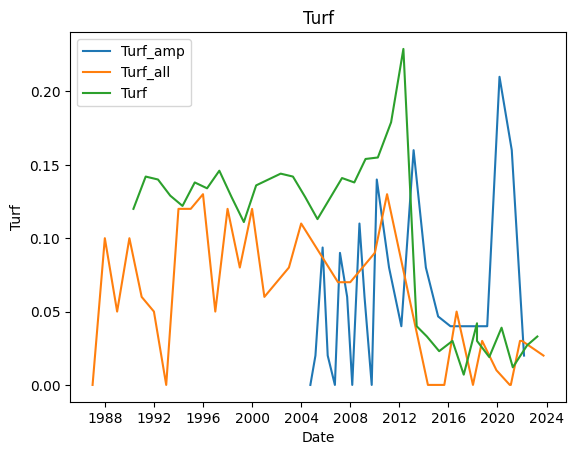

In [329]:
# add dead coral to turf amp and compare again the turf columns
data['Turf_amp'] = data['Turf_amp'] + data['Dead Coral']

# for turf
set_columns = ['Turf_amp', 'Turf_all', 'Turf']

# plot set of columns
plt.figure()
plt.title('Turf')
plt.xlabel('Date')
plt.ylabel('Turf')
plt.plot(data[set_columns], label=set_columns)
plt.legend()

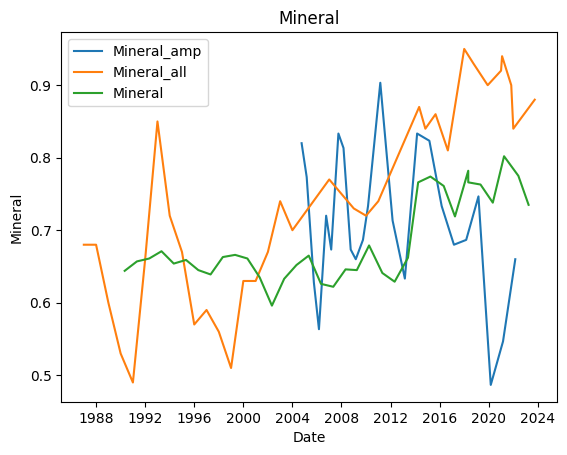

In [330]:
# compute a mineral column adding sand, rubble and pavement for each dataset
data['Mineral'] = data['Sand'] + data['Rubble'] + data['Pavement']
data['Mineral_amp'] = data['Sand_amp'] + data['Rubble_amp'] + data['Pavement_amp']
data['Mineral_all'] = data['Sand_all'] + data['Rubble_all'] + data['Pavement_all']

# for mineral
set_columns = ['Mineral_amp', 'Mineral_all', 'Mineral']

# plot set of columns
plt.figure()
plt.title('Mineral')
plt.xlabel('Date')
plt.ylabel('Mineral')
plt.plot(data[set_columns], label=set_columns)
plt.legend()



C:\Users\alexi\AppData\Local\Temp\ipykernel_312872\2597319847.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isnan(column[i-1]):
C:\Users\alexi\AppData\Local\Temp\ipykernel_312872\2597319847.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  death_rate.append(column[i-1] - column[i])
C:\Users\alexi\AppData\Local\Temp\ipykernel_312872\2597319847.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isnan(column[i-1]):

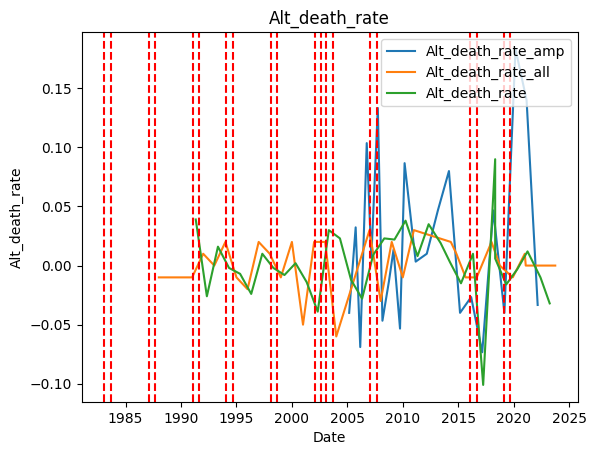

In [331]:
# create alt_death rate column for each dataset, equals to the difference between this year's live coral and last year's live coral, divided by last year's live coral
def compute_death_rate(column):
    death_rate = []
    death_rate.append(np.nan)
    for i in range(1, len(column)):
        if np.isnan(column[i-1]):
            death_rate.append(np.nan)
        else :
            death_rate.append(column[i-1] - column[i])
    return death_rate 

data['Alt_death_rate'] = compute_death_rate(data['Live Coral'])
data['Alt_death_rate_amp'] = compute_death_rate(data['Live Coral_amp'])
data['Alt_death_rate_all'] = compute_death_rate(data['Live Coral_all'])

# for alt_death_rate
set_columns = ['Alt_death_rate_amp', 'Alt_death_rate_all', 'Alt_death_rate']
# add column dead coral to alt death rate_amp
data['Alt_death_rate_amp'] = data['Alt_death_rate_amp'] + data['Dead Coral']

# plot set of columns
plt.figure()

plt.title('Alt_death_rate')
plt.xlabel('Date')
plt.ylabel('Alt_death_rate')
plt.plot(data[set_columns], label=set_columns)
plt.legend()

# bleaching events list
list_bleaching = ['1983-02', '1983-09', '1987-02', '1987-09','1991-02', '1991-09', '1994-02', '1994-09', '1998-02', '1998-09', '2002-02', '2002-09', '2003-02', '2003-09', '2007-02', '2007-09', '2016-02', '2016-09', '2019-02', '2019-09']

list_bleaching = pd.to_datetime(list_bleaching)

# add vertical lines for bleaching events
for i in list_bleaching:
    plt.axvline(x=i, color='r', linestyle='--')

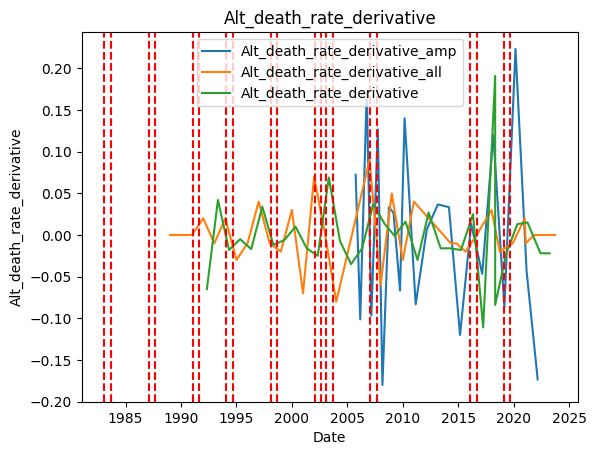

In [332]:
# compute the discrete derivative of the alt death rate and add it to the dataframe
data['Alt_death_rate_derivative'] = data['Alt_death_rate'].diff()
data['Alt_death_rate_derivative_amp'] = data['Alt_death_rate_amp'].diff()
data['Alt_death_rate_derivative_all'] = data['Alt_death_rate_all'].diff()

# for alt_death_rate_derivative
set_columns = ['Alt_death_rate_derivative_amp', 'Alt_death_rate_derivative_all', 'Alt_death_rate_derivative']

# plot set of columns
plt.figure()
plt.title('Alt_death_rate_derivative')
plt.xlabel('Date')
plt.ylabel('Alt_death_rate_derivative')
plt.plot(data[set_columns], label=set_columns)
plt.legend()

# add vertical lines for bleaching events
for i in list_bleaching:
    plt.axvline(x=i, color='r', linestyle='--')

In [333]:
data_amp.set_index('Date', inplace=True)
data_amp.index = pd.to_datetime(data_amp.index)

data_all.set_index('Date', inplace=True)
data_all.index = pd.to_datetime(data_all.index)

data_atpp.set_index('Date', inplace=True)
data_atpp.index = pd.to_datetime(data_atpp.index)

<Axes: xlabel='Date'>

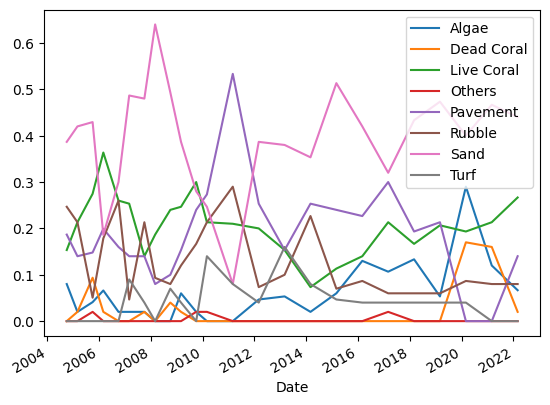

In [334]:
data_amp.plot()

In [336]:
data_amp['Alt_death_rate_amp'] = compute_death_rate(data_amp['Live Coral'])
data_all['Alt_death_rate_all'] = compute_death_rate(data_all['Live Coral'])
data_atpp['Alt_death_rate'] = compute_death_rate(data_atpp['Live Coral'])

C:\Users\alexi\AppData\Local\Temp\ipykernel_312872\2597319847.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isnan(column[i-1]):
C:\Users\alexi\AppData\Local\Temp\ipykernel_312872\2597319847.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  death_rate.append(column[i-1] - column[i])
C:\Users\alexi\AppData\Local\Temp\ipykernel_312872\2597319847.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isnan(column[i-1]):

In [337]:
data_amp['Alt_death_rate_derivative_amp'] = data_amp['Alt_death_rate_amp'].diff()
data_all['Alt_death_rate_derivative_all'] = data_all['Alt_death_rate_all'].diff()
data_atpp['Alt_death_rate_derivative'] = data_atpp['Alt_death_rate'].diff()

In [338]:
# correlation matrix
data_amp.corr()

,Algae,Dead Coral,Live Coral,Others,Pavement,Rubble,Sand,Turf,Alt_death_rate_amp,Alt_death_rate_derivative_amp
Algae,1.000000,0.612141,-0.127292,-0.125352,-0.374179,-0.371908,0.079224,-0.158171,-0.083291,0.137317
Dead Coral,0.612141,1.000000,0.136416,-0.000657,-0.607130,-0.261791,0.155180,-0.242593,-0.124047,0.054302
Live Coral,-0.127292,0.136416,1.000000,0.303679,-0.084395,-0.050331,-0.330612,-0.356361,-0.467218,-0.073596
Others,-0.125352,-0.000657,0.303679,1.000000,0.233179,-0.052187,-0.285648,0.039980,-0.161454,0.060704
Pavement,-0.374179,-0.607130,-0.084395,0.233179,1.000000,0.410746,-0.674067,0.295617,0.050734,-0.110197
Rubble,-0.371908,-0.261791,-0.050331,-0.052187,0.410746,1.000000,-0.605259,0.011816,0.457129,0.390038
Sand,0.079224,0.155180,-0.330612,-0.285648,-0.674067,-0.605259,1.000000,-0.186980,-0.119014,-0.267687
Turf,-0.158171,-0.242593,-0.356361,0.039980,0.295617,0.011816,-0.186980,1.000000,0.474912,0.181642
Alt_death_rate_amp,-0.083291,-0.124047,-0.467218,-0.161454,0.050734,0.457129,-0.119014,0.474912,1.000000,0.734288
Alt_death_rate_derivative_amp,0.137317,0.054302,-0.073596,0.060704,-0.110197,0.390038,-0.267687,0.181642,0.734288,1.000000


In [339]:
data_all.corr()

,Algae,Calcified Algae,Live Coral,Others,Pavement,Rubble,Sand,Turf,Alt_death_rate_all,Alt_death_rate_derivative_all
Algae,1.000000,-0.054445,0.041636,-0.017739,-0.172515,-0.263065,-0.387048,0.310682,-0.069312,0.069856
Calcified Algae,-0.054445,1.000000,0.292861,0.191045,-0.025346,-0.058381,-0.348758,0.293879,-0.056971,-0.088388
Live Coral,0.041636,0.292861,1.000000,-0.027930,-0.177727,-0.375108,0.020492,0.446772,-0.490154,-0.293334
Others,-0.017739,0.191045,-0.027930,1.000000,-0.141979,-0.404285,0.186491,-0.113332,-0.260049,-0.102723
Pavement,-0.172515,-0.025346,-0.177727,-0.141979,1.000000,0.304128,-0.202805,-0.229234,-0.020879,-0.107895
Rubble,-0.263065,-0.058381,-0.375108,-0.404285,0.304128,1.000000,-0.622199,-0.263396,0.253170,0.039234
Sand,-0.387048,-0.348758,0.020492,0.186491,-0.202805,-0.622199,1.000000,-0.307276,-0.059590,0.016814
Turf,0.310682,0.293879,0.446772,-0.113332,-0.229234,-0.263396,-0.307276,1.000000,-0.093642,-0.019198
Alt_death_rate_all,-0.069312,-0.056971,-0.490154,-0.260049,-0.020879,0.253170,-0.059590,-0.093642,1.000000,0.868133
Alt_death_rate_derivative_all,0.069856,-0.088388,-0.293334,-0.102723,-0.107895,0.039234,0.016814,-0.019198,0.868133,1.000000


In [340]:
data_atpp.corr()

,Algae,Calcified Algae,Live Coral,Others,Pavement,Rubble,Sand,Turf,Alt_death_rate,Alt_death_rate_derivative
Algae,1.000000,0.417779,-0.775480,-0.157556,0.821824,-0.288464,0.127981,-0.885258,-0.113083,-0.103768
Calcified Algae,0.417779,1.000000,-0.599257,0.337891,0.338528,0.083612,-0.258549,-0.371846,0.127578,-0.077330
Live Coral,-0.775480,-0.599257,1.000000,-0.099563,-0.722877,0.137822,-0.036945,0.599479,-0.294373,-0.093546
Others,-0.157556,0.337891,-0.099563,1.000000,-0.201926,0.482815,-0.555086,0.273835,0.070132,-0.146247
Pavement,0.821824,0.338528,-0.722877,-0.201926,1.000000,-0.516225,0.265562,-0.880920,-0.136410,-0.024801
Rubble,-0.288464,0.083612,0.137822,0.482815,-0.516225,1.000000,-0.904990,0.387125,0.223557,0.070988
Sand,0.127981,-0.258549,-0.036945,-0.555086,0.265562,-0.904990,1.000000,-0.219131,-0.073558,-0.008855
Turf,-0.885258,-0.371846,0.599479,0.273835,-0.880920,0.387125,-0.219131,1.000000,0.246131,0.134806
Alt_death_rate,-0.113083,0.127578,-0.294373,0.070132,-0.136410,0.223557,-0.073558,0.246131,1.000000,0.799327
Alt_death_rate_derivative,-0.103768,-0.077330,-0.093546,-0.146247,-0.024801,0.070988,-0.008855,0.134806,0.799327,1.000000
